In [1]:
## 오차역전파법 ##

In [2]:
## 곱셈 노드 구현

In [3]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    # 순전파
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    # 역전파
    def backword(self, dout):
        dx = dout * self.y  # x와 y의 자리를 바꾼다
        dy = dout * self.x

        return dx, dy

In [4]:
## MulLayer 예제

apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [5]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backword(dprice)
dapple, dapple_num = mul_apple_layer.backword(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [6]:
## 덧셈 계층 구현하기

In [7]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [8]:
## 덧셈과 곱셈 계층 예시

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backword(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backword(dorange_price)
dapple, dapple_num = mul_apple_layer.backword(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [9]:
## ReLu 계층 구현하기
class Relu:
    def __init__(self):
        self.mask = None  # mask는 True와 False로 구성된 넘파이 배열

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out
    
    def backward(self, dout):
        dout[self.mask] = 0  # 0 보다 작은 곳(즉, True인 곳)은 0으로 전환
        dx = dout

        return dx

In [10]:
# forward 함수 부문 예시
import numpy as np

x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [11]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


In [12]:
## Sigmoid 계층 구현

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [13]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [14]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [15]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

In [17]:
## Affine 구현
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [18]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *

In [19]:
## Softmax-with-Loss 구현하기

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None  # 손실
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블(원-핫 벡터)

    def forward(self, x, t):
        self.t = t
        self.y = Softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

train acc, test acc | 0.15801666666666667, 0.1649
train acc, test acc | 0.9036833333333333, 0.9062
train acc, test acc | 0.9215833333333333, 0.9235
train acc, test acc | 0.9367, 0.9346
train acc, test acc | 0.9432166666666667, 0.9415
train acc, test acc | 0.9505, 0.9463
train acc, test acc | 0.95645, 0.9535
train acc, test acc | 0.96075, 0.9568
train acc, test acc | 0.9648666666666667, 0.9606
train acc, test acc | 0.96865, 0.9641
train acc, test acc | 0.97075, 0.9656
train acc, test acc | 0.9734333333333334, 0.9653
train acc, test acc | 0.97455, 0.9677
train acc, test acc | 0.9771166666666666, 0.9702
train acc, test acc | 0.9761666666666666, 0.9687
train acc, test acc | 0.9794333333333334, 0.9697
train acc, test acc | 0.9796833333333334, 0.9697


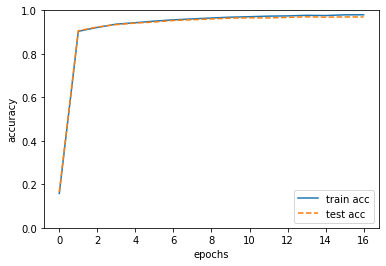

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from TwoLayerNet_bacpropa import TwoLayerNet
import matplotlib.pyplot as plt

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100   # 미니 배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []


# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법으로 기울기 구하기
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에퐄당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()